In [3]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ph_scan import *

#### Let's try to zoom in on the areas where the surveys were done

In [5]:
# -- read in the survey coordinates
# spath = os.path.join("..", "supplementary", "sites_geocoded.csv")
spath = os.path.join("supplementary", "sites_geocoded.csv")
sites = pd.read_csv(spath)
lats  = sites.latitude.dropna().values
lons  = sites.longitude.dropna().values

In [6]:
# -- get the complete list of imaging coordinates
cpath  = os.path.join("Delivery", "*", "*P00*MUL", "*.IMD")
clist  = np.array(sorted(glob.glob(cpath)))
cstrs  = [[line for line in open(i, "r")] for i in clist]
coords = np.zeros([len(clist), 4])

for ii, cstr in enumerate(cstrs):
    coords[ii] = [[float(line.split("=")[1][:-2]) for line in cstr if "ULLat" in line][0], 
                  [float(line.split("=")[1][:-2]) for line in cstr if "ULLon" in line][0], 
                  [float(line.split("=")[1][:-2]) for line in cstr if "LRLat" in line][0], 
                  [float(line.split("=")[1][:-2]) for line in cstr if "LRLon" in line][0]]

In [38]:
# -- let's try the first one
tlat = lats[1]
tlon = lons[1]
# tlat = 41.75955
# tlon = -88.34591

ind  = (tlat < coords[:, 0]) & (tlat >= coords[:, 2]) & (tlon >= coords[:, 1]) & (tlon < coords[:, 3])

In [39]:
clist[ind]

array([ 'Delivery/057773250010_01/057773250010_01_P001_MUL/17JUN02165316-M2AS-057773250010_01_P001.IMD',
       'Delivery/057773250010_01/057773250010_01_P002_MUL/17SEP18165731-M2AS-057773250010_01_P002.IMD',
       'Delivery/057773250010_01/057773250010_01_P003_MUL/17SEP29170927-M2AS-057773250010_01_P003.IMD',
       'Delivery/057773250130_01/057773250130_01_P001_MUL/17SEP18165737-M2AS-057773250130_01_P001.IMD'],
      dtype='|S93')

In [40]:
ullat, ullon, lrlat, lrlon = coords[ind][0]
scan = PhScan(clist[ind][0].replace(".IMD", ".TIF"))
nrow, ncol = scan.rgb.shape[:2]

reading Delivery/057773250010_01/057773250010_01_P001_MUL/17JUN02165316-M2AS-057773250010_01_P001.TIF...
extracting to array...  (extracted in 0.96033000946s)
rescaling...


In [120]:
print ullat, ullon, lrlat, lrlon

 42.088707 -87.807375 41.964813 -87.703749


In [121]:
print ullat2, ullon2, lrlat2, lrlon2

42.81482 -89.19648 40.68886 -87.52823


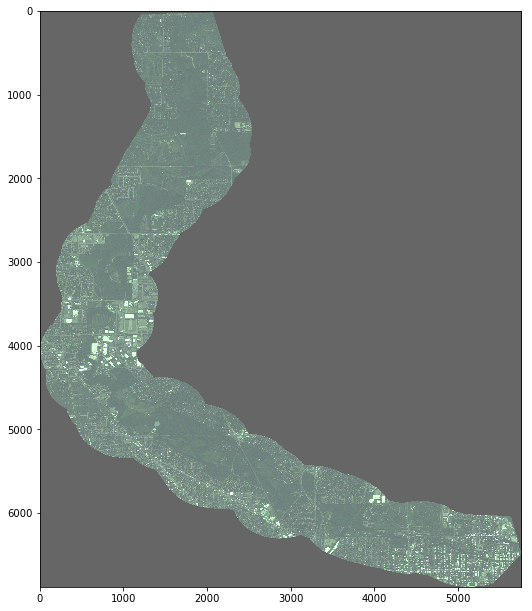

In [68]:
# xsize = 8.
# ysize = xsize * float(nrow) / float(ncol)

ysize = 8.
xsize = ysize * float(ncol) / float(nrow)

fig0, ax0 = plt.subplots(num=0, figsize=[xsize, ysize])
fig0.subplots_adjust(0, 0, 1, 1)
# ax0.grid("off")
# im1 = ax0.imshow((2.0 * scan.rgb))
im1 = ax0.imshow((2.0 * scan.rgb).clip(0, 1), alpha=0.6)
fig0.canvas.draw()
plt.savefig("cluster_100/ph1.png")

In [101]:
import scipy.ndimage as nd
fname = 'image/LC08_L1TP_023031_20180427_20180502_01_T1_TIR.tif'
img = nd.imread(fname)

In [108]:
img.shape

(7951, 7831)

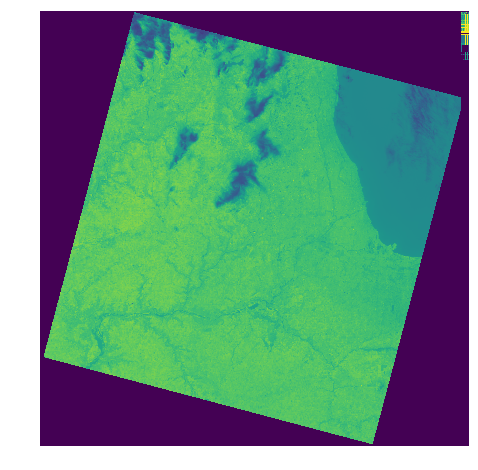

In [102]:
ysize = 8.
xsize = ysize * float(img.shape[1]) / float(img.shape[0])

fig_sp, ax_sp = plt.subplots(num=0, figsize=[xsize, ysize])
# fig_sp.subplots_adjust(0, 0, 1, 1)
ax_sp.axis("off")
im_sp = ax_sp.imshow(img)
fig_sp.canvas.draw()

In [19]:
img.shape

(7951, 7831)

In [20]:
nrow2, ncol2 = img.shape[:2]

In [42]:
ullat2, ullon2, lrlat2, lrlon2 = 42.81482, -89.19648, 40.68886, -87.52823

In [43]:
deltlat = (lrlat2-ullat2)/nrow2
deltlat

-0.0002673827191548232

In [44]:
r1 = int(round((ullat - ullat2)/deltlat))
r1

2716

In [45]:
r2 = int(round((lrlat - ullat2)/deltlat))
r2

3179

In [46]:
deltlon = (lrlon2-ullon2)/ncol2
deltlon

0.00021303154131017756

In [47]:
c1 = int(round((ullon - ullon2)/deltlon))
c1

6521

In [48]:
c2 = int(round((lrlon - ullon2)/deltlon))
c2

7007

In [116]:
scan.rgb.shape

(6884, 5758, 3)

In [109]:
img[r1:r2, c1:c2].shape

(463, 486)

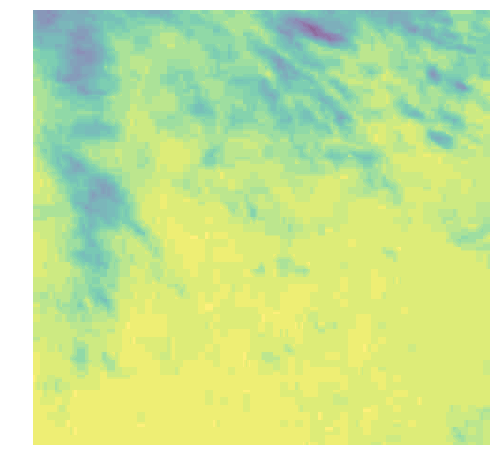

In [115]:
ysize = 8.
xsize = ysize * float(c2-c1) / float(r2-r1)

fig_sp, ax_sp = plt.subplots(num=0, figsize=[xsize, ysize])
# fig_sp.subplots_adjust(0, 0, 1, 1)
ax_sp.axis("off")
im_sp = ax_sp.imshow(img[r1:r2, c1:c2], alpha=0.6)
# im1 = ax_sp.imshow((2.0 * scan.rgb).clip(0, 1), alpha=0.6)
fig_sp.canvas.draw()
plt.savefig("cluster_100/pl1.png")

In [103]:
from PIL import Image

imbg = Image.open("cluster_100/ph1.png")
imfg = Image.open("cluster_100/pl1.png")
imbg_width, imbg_height = imbg.size
imfg_resized = imfg.resize((imbg_width, imbg_height))
# imbg.paste(imfg_resized)
new_img = Image.blend(imbg, imfg_resized, 0.5)
new_img.save("new.png","PNG")
# imbg.save("overlay.png")